<a href="https://colab.research.google.com/github/ShubhMody/Tensorflow-Developer-Certification-Prep/blob/main/03_Introduction_to_computer_vision_with_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN and Computer Vision with TensorFlow

### Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-08 07:43:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.128, 142.251.167.128, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   121MB/s    in 0.9s    

2023-07-08 07:43:30 (121 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the Data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
#another way tp find out the number of images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

### To visualize our images, first get the class names programmatically

In [ ]:
#Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
#Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #read in the image and then plot it
  img = mpimg.imread(target_folder +"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['962785.jpg']
Image shape: (512, 341, 3)


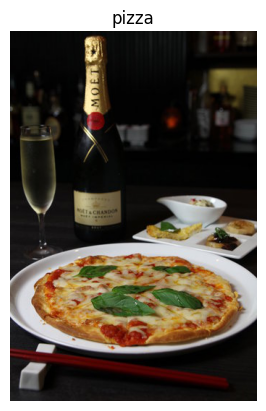

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [ ]:
img

array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [23, 16, 10],
        [19, 12,  6],
        [17, 10,  4]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [24, 17, 11],
        [20, 13,  7],
        [18, 11,  5]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [25, 18, 12],
        [21, 14,  8],
        [19, 12,  6]],

       ...,

       [[34, 34, 34],
        [33, 33, 33],
        [32, 32, 32],
        ...,
        [14, 12, 13],
        [14, 12, 13],
        [14, 12, 13]],

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [13, 11, 12],
        [13, 11, 12],
        [13, 11, 12]],

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [13, 11, 12],
        [12, 10, 11],
        [12, 10, 11]]], dtype=uint8)

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 341, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [23, 16, 10],
        [19, 12,  6],
        [17, 10,  4]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [24, 17, 11],
        [20, 13,  7],
        [18, 11,  5]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [25, 18, 12],
        [21, 14,  8],
        [19, 12,  6]],

       ...,

       [[34, 34, 34],
        [33, 33, 33],
        [32, 32, 32],
        ...,
        [14, 12, 13],
        [14, 12, 13],
        [14, 12, 13]],

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [13, 11, 12],
        [13, 11, 12],
        [13, 11, 12]],

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [13, 11, 12],
        [12, 10, 11],
        [12, 10, 11]]], dtype=uint8)>

In [ ]:
img.shape

(512, 341, 3)

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocess Data. Get all pixel values between 0 and 1. Also called as scaling
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)


#Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"


#Import Data From direcrtories and turn it into batches
train_data = train_datagen.flow_from_directory(directory  = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

# Build a CNN model (same as Tiny VGG on the CNN explainer webiste)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size =3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#Compile our CNN

model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fi the model

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 31s 307ms/step - loss: 0.5537 - accuracy: 0.7240 - val_loss: 0.3877 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 12s 267ms/step - loss: 0.4306 - accuracy: 0.8120 - val_loss: 0.4162 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 11s 224ms/step - loss: 0.4047 - accuracy: 0.8227 - val_loss: 0.3444 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 13s 279ms/step - loss: 0.3690 - accuracy: 0.8347 - val_loss: 0.3179 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3291 - accuracy: 0.8620 - val_loss: 0.3214 - val_accuracy: 0.8700


## Using the same model as before which we used for non linear data for image classification

In [ ]:
#set random seed
tf.random.set_seed(42)

#Create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 214ms/step - loss: 0.7062 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 255ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 256ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 257ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 256ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#set random seed
tf.random.set_seed(42)

#Create a model to replicate the tensorflow playground model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 214ms/step - loss: 4.4352 - accuracy: 0.5973 - val_loss: 0.6272 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.8096 - accuracy: 0.6887 - val_loss: 1.1677 - val_accuracy: 0.5220
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6444 - accuracy: 0.7107 - val_loss: 0.6795 - val_accuracy: 0.6120
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.5679 - accuracy: 0.7500 - val_loss: 0.4437 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4732 - accuracy: 0.7907 - val_loss: 0.4131 - val_accuracy: 0.8000


['1241193.jpg']
Image shape: (512, 512, 3)
['2112757.jpg']
Image shape: (512, 512, 3)


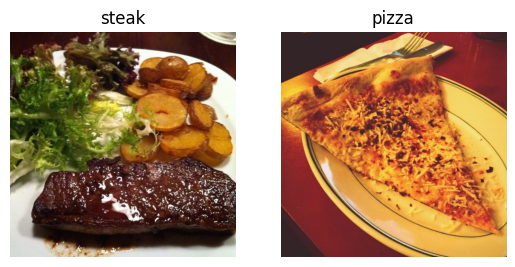

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_image = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_image = view_random_image("pizza_steak/train/", "pizza")

## Preprocess the data (prepare it for model)

In [ ]:
#Define Directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#Load in our image data from directories and turn them into bartches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get s sample of train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
images[:2]

array([[[[0.47058827, 0.40784317, 0.34509805],
         [0.4784314 , 0.427451  , 0.3647059 ],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.8313726 , 0.70980394, 0.48627454],
         [0.8431373 , 0.73333335, 0.5372549 ],
         [0.87843144, 0.7725491 , 0.5882353 ]],

        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.5058824 ],
         [0.8431373 , 0.73333335, 0.5372549 ]],

        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.49411768],
         [0.8352942 , 0.7176471 , 0.5137255 ]],

        ...,

        [[0.77647066, 0.5647059 , 0.2901961 ],
         [0.7803922 , 0.53333336, 0.22352943]

In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
#View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## Lets Create a CNN model (starting with a baseline)

In [ ]:
#make the creation of our model a little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
#Create the model
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
#compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics= ["accuracy"])


## Fit the model

In [ ]:
#check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
#fit the model
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 255ms/step - loss: 0.9138 - accuracy: 0.6260 - val_loss: 0.5295 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 11s 225ms/step - loss: 0.5012 - accuracy: 0.7780 - val_loss: 0.4329 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 13s 272ms/step - loss: 0.3501 - accuracy: 0.8587 - val_loss: 0.4374 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.1553 - accuracy: 0.9580 - val_loss: 0.5124 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 11s 230ms/step - loss: 0.0483 - accuracy: 0.9907 - val_loss: 0.5849 - val_accuracy: 0.7760


In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 148ms/step - loss: 0.5849 - accuracy: 0.7760


[0.5849218964576721, 0.7760000228881836]

In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 199ms/step - loss: 0.3214 - accuracy: 0.8700


[0.3213529884815216, 0.8700000047683716]

## Evaluating our model

In [ ]:
import pandas as pd

<Axes: >

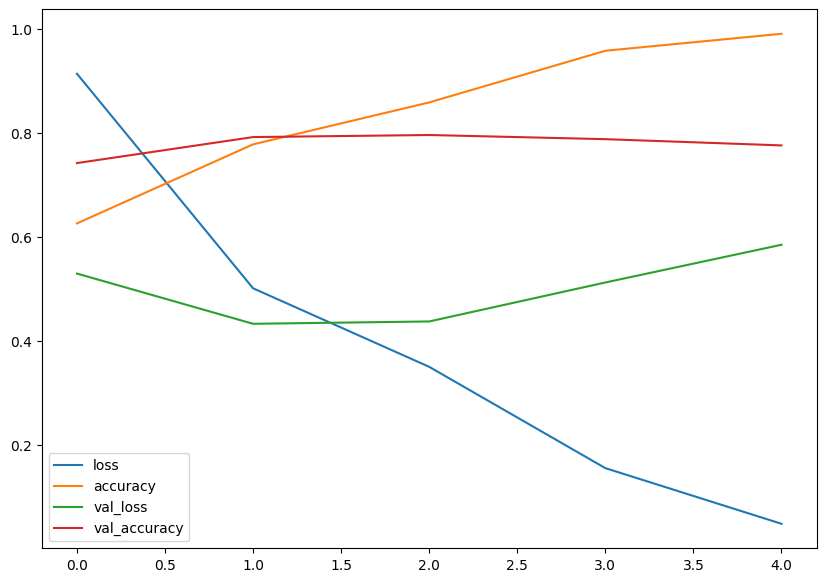

In [ ]:
pd.DataFrame(history_4.history).plot(figsize = (10,  7))

In [ ]:
#plot the validation and training curves seperately
def plot_loss_curves(history):

  """
  retruns seperate loss curves for training and vlaidation

  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #how many epochs did we run for?

  #Plot loss
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "validation loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()


  #Plot Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training accuracy")
  plt.plot(epochs, val_accuracy, label = "validation accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

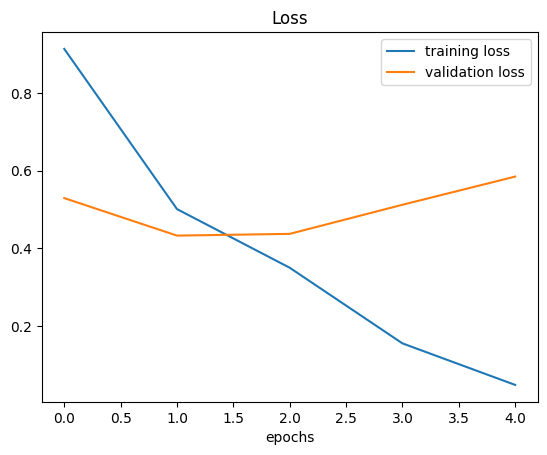

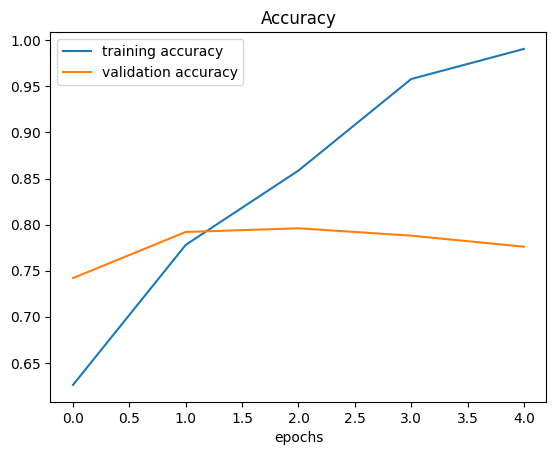

In [ ]:
plot_loss_curves(history_4)

Adjust the model parameters
Fitting a machine learning model comes in 3 steps:
0. Create a basline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.
So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

Reduce Overfitting:
* Add Data Augmentation
* Add Regularization (such as MaxPool2D layer)
* Add more data

In [ ]:
#Create the model (This is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")

])

In [ ]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


In [ ]:
#Fit the model
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 222ms/step - loss: 0.6492 - accuracy: 0.6093 - val_loss: 0.5564 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4726 - accuracy: 0.7793 - val_loss: 0.3736 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4049 - accuracy: 0.8093 - val_loss: 0.3495 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3773 - accuracy: 0.8287 - val_loss: 0.3323 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.3495 - accuracy: 0.8520 - val_loss: 0.3037 - val_accuracy: 0.8780


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

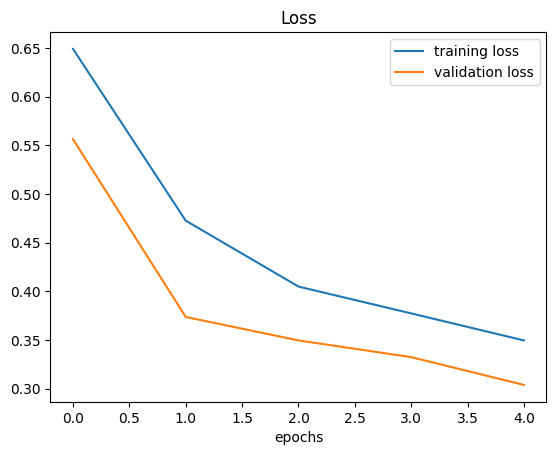

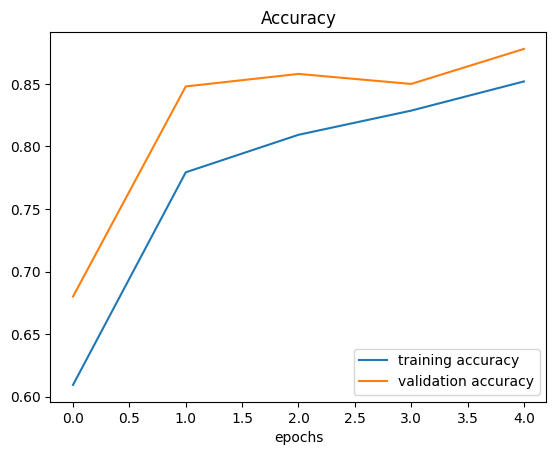

In [ ]:
plot_loss_curves(history_5)

## Finding Data Augmentation

In [ ]:
#Create ImaegDataGenerator training Instance with data augmentation
train_datagen_augmented =  ImageDataGenerator(rescale = 1/255.,
                                              rotation_range =0.2,
                                              shear_range = 0.2,
                                              zoom_range = 0.2,
                                              width_shift_range = 0.2,
                                              height_shift_range = 0.2,
                                              horizontal_flip = True)

#Create ImageDataGenerator without augmentation
train_datagen = ImageDataGenerator(rescale = 1./255)

#Create ImageDataGenerator without augmentation for test data
test_datagen = ImageDataGenerator(rescale= 1./255)

### What is Data Augmentation?
Data Augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar  

In [ ]:
#import data and augment it from training directory
print("Augmented Training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = False)

#Create a non-augmented train data
print("Non-augmented Training Data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size =32,
                                               class_mode = "binary",
                                               shuffle = False)

#create a non-augmented test data
print("Non-augmented Test Data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size =32,
                                             class_mode = "binary",
                                             shuffle = False)

Augmented Training data:
Found 1500 images belonging to 2 classes.
Non-augmented Training Data:
Found 1500 images belonging to 2 classes.
Non-augmented Test Data:
Found 500 images belonging to 2 classes.


In [ ]:
#Get Sample augmneted data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


Showing image number: 10


(-0.5, 223.5, 223.5, -0.5)

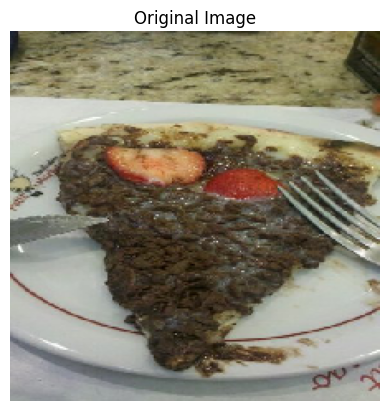

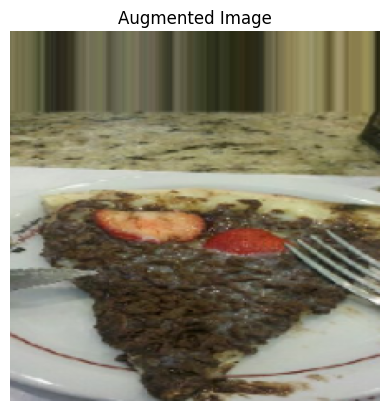

In [ ]:
#show original image and augmented image
import random
random_number = random.randint(0, 32)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

## No we have seen what augmneted training data looks like, lets build a model to see how it learns on augmented data

In [ ]:
#Create a Model
model_6 = Sequential([
    Conv2D(10, 3, activation ="relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation ="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation ="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

#compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

#Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))


Epoch 1/5
47/47 [==============================] - 26s 527ms/step - loss: 0.7084 - accuracy: 0.4580 - val_loss: 0.6811 - val_accuracy: 0.5420
Epoch 2/5
47/47 [==============================] - 24s 505ms/step - loss: 0.6954 - accuracy: 0.4980 - val_loss: 0.6761 - val_accuracy: 0.5500
Epoch 3/5
47/47 [==============================] - 24s 508ms/step - loss: 0.6780 - accuracy: 0.5353 - val_loss: 0.6161 - val_accuracy: 0.7400
Epoch 4/5
47/47 [==============================] - 24s 508ms/step - loss: 0.6953 - accuracy: 0.6940 - val_loss: 0.5161 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 23s 496ms/step - loss: 0.6658 - accuracy: 0.6187 - val_loss: 0.6093 - val_accuracy: 0.6640


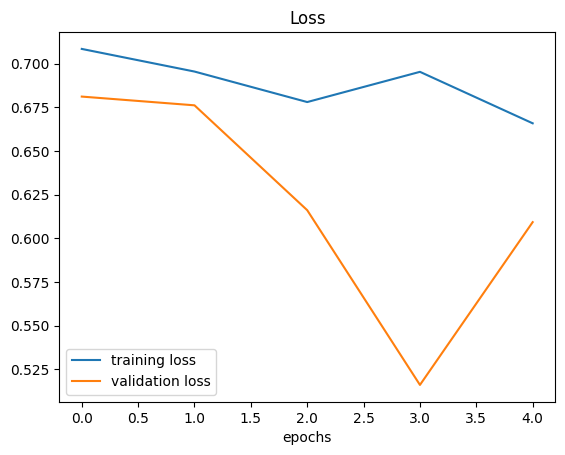

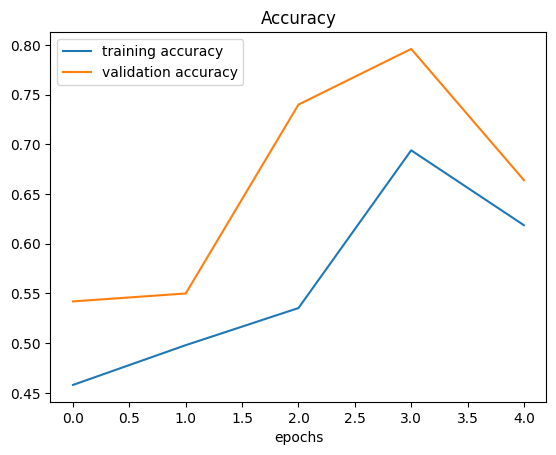

In [ ]:
plot_loss_curves(history_6)

### Lets shuffle our augmneted training data and see what happens.

In [ ]:
# import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = (224, 224),
                                                                            class_mode = "binary",
                                                                            batch_size = 32,
                                                                            shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
#Create the model
model_7 = Sequential([
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

#compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

#fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 505ms/step - loss: 0.6931 - accuracy: 0.5300 - val_loss: 0.6345 - val_accuracy: 0.6680
Epoch 2/5
47/47 [==============================] - 25s 534ms/step - loss: 0.5755 - accuracy: 0.7133 - val_loss: 0.4302 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 24s 517ms/step - loss: 0.5086 - accuracy: 0.7533 - val_loss: 0.4350 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 24s 518ms/step - loss: 0.5078 - accuracy: 0.7593 - val_loss: 0.3985 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 24s 523ms/step - loss: 0.4964 - accuracy: 0.7587 - val_loss: 0.3933 - val_accuracy: 0.8260


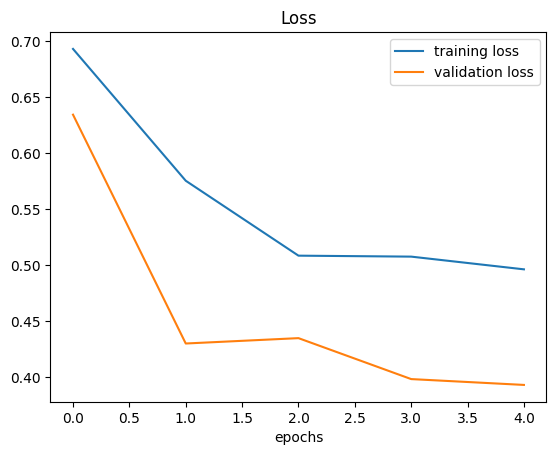

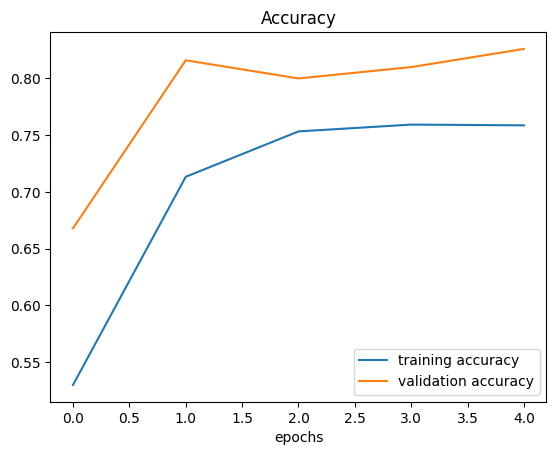

In [ ]:
#Plot loss curves
plot_loss_curves(history_7)

# Make a prediction with our model on a custom data


In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
#View our example image
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true

--2023-07-08 07:55:16--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg [following]
--2023-07-08 07:55:16--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg [following]
--2023-07-08 07:55:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com 

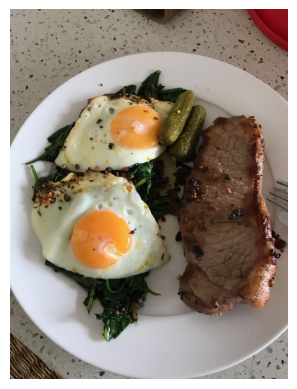

In [ ]:
steak = mpimg.imread("03-steak.jpeg?raw=true")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [ ]:
expanded_steak = tf.expand_dims(steak, axis = 0)

In [ ]:
expanded_steak.shape

TensorShape([1, 4032, 3024, 3])

In [ ]:
#Lets create a function to import an image and resize it to be able to be used with our model.
def load_and_prep_image(filename, img_shape = 224):
  #Read in the image
  img = tf.io.read_file(filename)

  #Decode the read file into tensor
  img = tf.image.decode_image(img)

  #resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  #rescale the image and get all values between 0 and 1
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg?raw=true")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis = 0))

1/1 [==============================] - 0s 187ms/step


In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  #import the taregt image and preprocess it
  img = load_and_prep_image(filename)

  #make a prediction
  pred = model_7.predict(tf.expand_dims(img, axis = 0))

  #get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);



1/1 [==============================] - 0s 22ms/step


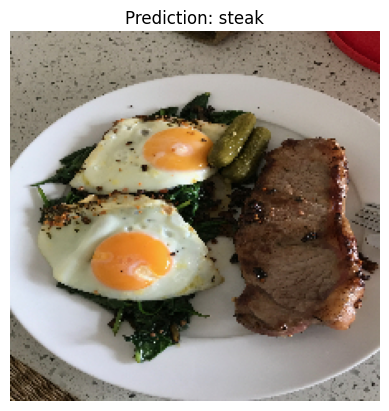

In [ ]:
#Test our model on custom image
pred_and_plot(model_7, "03-steak.jpeg?raw=true")

## Multi-class Classification
We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).

🛠 Practice: Before scrolling down, how do you think we might change our model to work with 10 classes of the same kind of images? Assume the data is in the same style as our two class problem.

Remember the steps we took before to build our pizza 🍕 vs. steak 🥩 classifier?

How about we go through those steps again, except this time, we'll work with 10 different types of food.

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

### Import and become one with data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-08 08:12:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  55.7MB/s    in 10s     

2023-07-08 08:12:47 (49.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in '10_food_classes_all_data'.
there are 10 directories and 0 images in '10_food_classes_all_data/train'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

#### We'll now setup the training and test directory paths.

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3387675.jpg']
Image shape: (512, 512, 3)


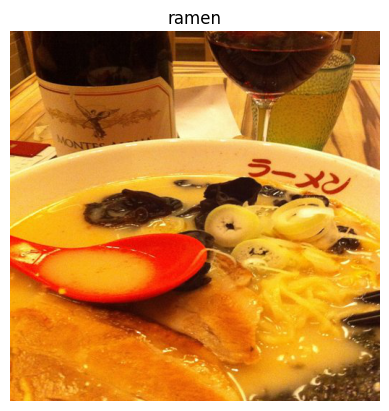

In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

## 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Create a Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

#Create our model
model_8 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3), activation ="relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax") #changed to have 10 output neurons and softmax activation
])

#compile
model_8.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit the model
history_8 = model_8.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 59s 236ms/step - loss: 2.1884 - accuracy: 0.1891 - val_loss: 2.0862 - val_accuracy: 0.2484
Epoch 2/5
235/235 [==============================] - 52s 222ms/step - loss: 1.8542 - accuracy: 0.3607 - val_loss: 1.9669 - val_accuracy: 0.3076
Epoch 3/5
235/235 [==============================] - 56s 240ms/step - loss: 1.3697 - accuracy: 0.5353 - val_loss: 2.1062 - val_accuracy: 0.3032
Epoch 4/5
235/235 [==============================] - 52s 220ms/step - loss: 0.6897 - accuracy: 0.7765 - val_loss: 2.9884 - val_accuracy: 0.2732
Epoch 5/5
235/235 [==============================] - 60s 256ms/step - loss: 0.2295 - accuracy: 0.9348 - val_loss: 4.3409 - val_accuracy: 0.2616


## Evaluate the model

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 15s 183ms/step - loss: 4.3409 - accuracy: 0.2616


[4.340871334075928, 0.26159998774528503]

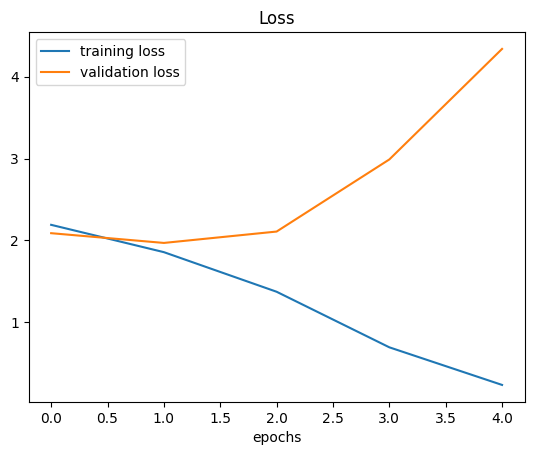

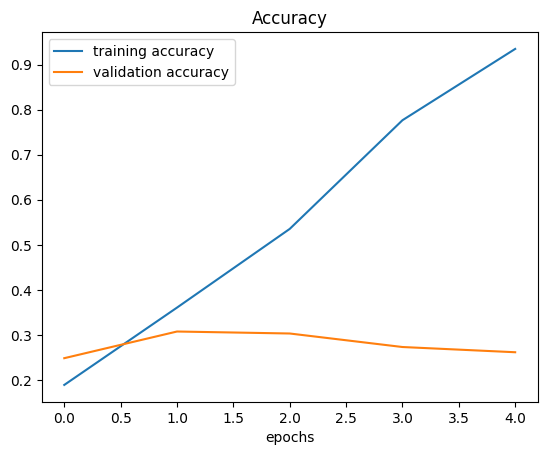

In [ ]:
plot_loss_curves(history_8)

## Making changes to our model to overcome overfitting

Lets try to simplify the model first by removing some conv2d layers

In [ ]:
#Create our model
model_9 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3), activation ="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax") #changed to have 10 output neurons and softmax activation
])

#compile
model_9.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit the model
history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 56s 227ms/step - loss: 2.2835 - accuracy: 0.2128 - val_loss: 2.0500 - val_accuracy: 0.2576
Epoch 2/5
235/235 [==============================] - 52s 221ms/step - loss: 1.8586 - accuracy: 0.3617 - val_loss: 1.9575 - val_accuracy: 0.3052
Epoch 3/5
235/235 [==============================] - 61s 261ms/step - loss: 1.5155 - accuracy: 0.4944 - val_loss: 2.0624 - val_accuracy: 0.2984
Epoch 4/5
235/235 [==============================] - 73s 312ms/step - loss: 1.0793 - accuracy: 0.6525 - val_loss: 2.4257 - val_accuracy: 0.2768
Epoch 5/5
235/235 [==============================] - 59s 253ms/step - loss: 0.6742 - accuracy: 0.7956 - val_loss: 2.9105 - val_accuracy: 0.2548


In [ ]:
#Evaluate the model
model_9.evaluate(test_data)

79/79 [==============================] - 14s 177ms/step - loss: 2.9105 - accuracy: 0.2548


[2.910475969314575, 0.2547999918460846]

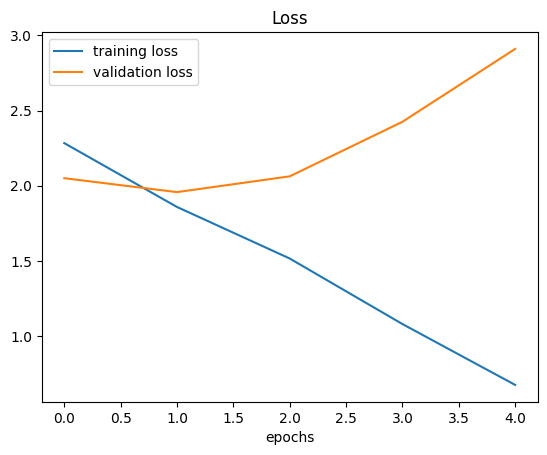

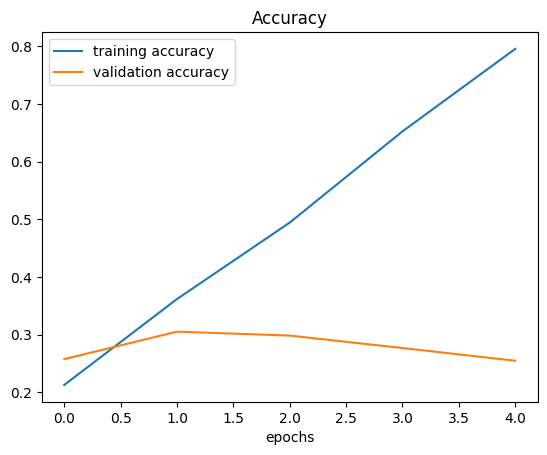

In [ ]:
plot_loss_curves(history_9)

## Let's try to reduce overfitting with data augmentation


In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [ ]:
# Clone the model (use the same architecture)
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (same setup as used for model_10)
model_10.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 131s 543ms/step - loss: 2.2211 - accuracy: 0.1860 - val_loss: 2.0316 - val_accuracy: 0.2724
Epoch 2/5
235/235 [==============================] - 128s 544ms/step - loss: 2.1047 - accuracy: 0.2468 - val_loss: 1.9864 - val_accuracy: 0.2900
Epoch 3/5
235/235 [==============================] - 125s 533ms/step - loss: 2.0496 - accuracy: 0.2696 - val_loss: 1.9219 - val_accuracy: 0.3188
Epoch 4/5
235/235 [==============================] - 126s 537ms/step - loss: 2.0174 - accuracy: 0.2903 - val_loss: 1.8944 - val_accuracy: 0.3408
Epoch 5/5
235/235 [==============================] - 125s 532ms/step - loss: 2.0006 - accuracy: 0.2944 - val_loss: 1.9485 - val_accuracy: 0.3312


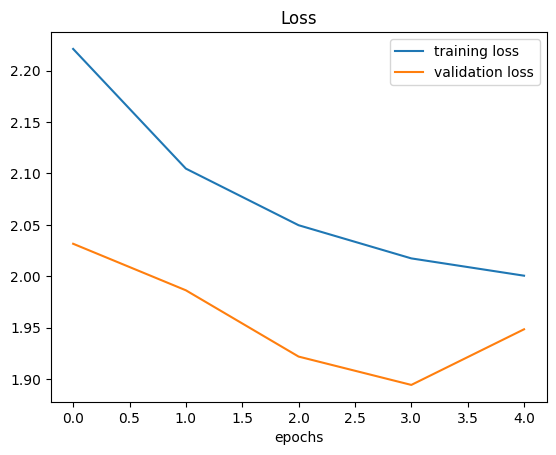

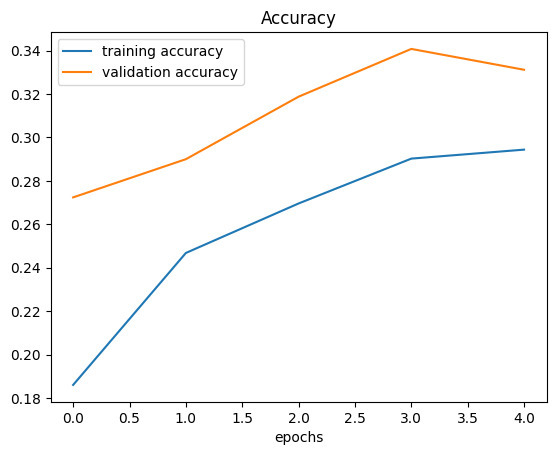

In [ ]:
plot_loss_curves(history_10)

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

### We need to update the pred_and_plot function for multiclass classification

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg?raw=true

--2023-07-08 11:28:21--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-sushi.jpeg [following]
--2023-07-08 11:28:21--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-sushi.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg [following]
--2023-07-08 11:28:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com 

1/1 [==============================] - 0s 157ms/step


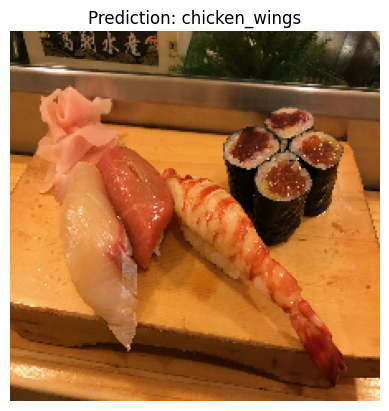

In [ ]:
pred_and_plot(model_10, "03-sushi.jpeg?raw=true", class_names)

##Lets save our model

In [ ]:
model_10.save("save_trained_model_10")

In [ ]:
#load model 10
loaded_model_10 = tf.keras.models.load_model("save_trained_model_10")

#evaluate the model to check if it still performs the same
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 14s 180ms/step - loss: 1.9485 - accuracy: 0.3312


[1.9484671354293823, 0.3312000036239624]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 1.9485 - accuracy: 0.3312


[1.9484676122665405, 0.3312000036239624]

## We have Improved on our model performance but still its Not the best model for deploymnet. We wil try to improve its performance in the next module which is using Transfer learning
